
# Computational Linguistics - Topic Modeling

In this lab, we will explore two topic modeling methods: LDA and NMF. Please check the readings to learn about these methods. 

To understand LDA and NMF we will create a toy dataset by downloading some wikipedia text. 

In [1]:
import wikipedia
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

wikipedia.set_lang("en")

In [ ]:
# # this class fetches summary text from a wiki page

# class TextFetcher:

#     def __init__(self, title):
#         self.title = title
#         page = wikipedia.page(title)
#         self.text = page.summary

#     def getText(self):
#         return self.text

In [2]:
def preprocessor(text):
#     nltk.download('stopwords')  # you might have uncomment this 
    tokens = word_tokenize(text)
    return (" ").join([word for word in tokens if word not in stopwords.words()])

## Create a toy dataset

Let's create toy dataset of 6 wiki articles. For simplitycity we will extract the summary text (see above code). 

In [3]:
nyc = wikipedia.page("New York City", auto_suggest=False)
text1 = nyc.summary
nlp = wikipedia.page("Natural Language Processing", auto_suggest=False)
text2 = nlp.summary
tgg = wikipedia.page("The Great Gatsby", auto_suggest=False)
text3 = tgg.summary
ml = wikipedia.page("Machine Learning", auto_suggest=False)
text4 = ml.summary
la = wikipedia.page("Los Angeles", auto_suggest=False)
text5 = la.summary
covid = wikipedia.page("Coronavirus",  auto_suggest=False)
text6 = covid.summary

docs = [text1, text2, text3, text4, text5, text6]

## Create a term frequency matrix

LDA works on term frequency matrix.

In [4]:
count_vectorizer = CountVectorizer(stop_words='english')
# count_vectorizer = CountVectorizer(stop_words='english', max_features=100)
term_frequency = count_vectorizer.fit_transform(docs)
feature_names = count_vectorizer.get_feature_names()

In [5]:
print(f"Shape of term freq matrix = {term_frequency.shape}")
print(f"Num of features identified = {len(feature_names)}")

Shape of term freq matrix = (6, 704)
Num of features identified = 704


In the `CountVectorizer` method, we can use `max_features` to set the number of features if required.

## Fit an LDA model

Let's fit an LDA model with 5 topics (aka components). 

In [6]:
lda = LatentDirichletAllocation(n_components=5, random_state=0)  # random_state is for replicating the result
lda.fit(term_frequency)    

LatentDirichletAllocation(n_components=5, random_state=0)

## Analyze the topics

Now, let's print the top 10 words based on the words's weight learned by the LDA. 

In [7]:
print(f"Num of topics = {len(lda.components_)}")

# words' weights associated with topic 0
lda.components_[0]

Num of topics = 5


array([0.2000007 , 0.2000003 , 0.20000019, 0.2000003 , 0.2000003 ,
       0.20000019, 0.20000019, 0.20000019, 0.20000019, 0.20000019,
       0.20000019, 0.2000003 , 0.20000019, 0.20000017, 0.2000003 ,
       0.2000003 , 0.2000003 , 0.2000003 , 0.2000003 , 0.20000019,
       1.19999899, 0.20000019, 0.2000003 , 0.20000024, 0.20000024,
       0.20000021, 0.2000003 , 0.20000024, 0.2000003 , 0.20000019,
       0.20000044, 0.20000019, 0.2000003 , 0.20000019, 0.2000003 ,
       0.20000016, 0.2000005 , 0.2000003 , 0.20000019, 0.2000003 ,
       0.20000019, 0.20000019, 0.20000019, 1.19999899, 0.20000019,
       0.20000019, 1.19999899, 0.20000019, 0.2000003 , 0.20000019,
       0.20000019, 0.20000019, 0.2000003 , 0.20000019, 0.20000019,
       0.20000019, 0.2000003 , 0.20000024, 0.2000005 , 0.2000003 ,
       0.20000024, 0.2000003 , 0.20000024, 0.20000053, 0.20000024,
       0.20000024, 0.20000024, 0.2000003 , 0.2000005 , 0.2000003 ,
       0.2000005 , 0.20000017, 0.20000066, 0.20000066, 0.20000

In [8]:
feature_names[:25]

['000',
 '10',
 '120',
 '13',
 '1542',
 '1624',
 '1626',
 '1653',
 '1664',
 '1673',
 '1674',
 '1781',
 '1785',
 '1790',
 '18',
 '1821',
 '1848',
 '1850',
 '1890s',
 '1898',
 '19',
 '190',
 '1913',
 '1922',
 '1924']

In [9]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, term_weights in enumerate(model.components_):
        
        # get the index of top-k terms
        sorted_indx = term_weights.argsort()
#         print(sorted_indx)
#         topk_words = [(feature_names[i], term_weights[i])for i in sorted_indx[-no_top_words - 1:]]
        topk_words = [feature_names[i] for i in sorted_indx[-no_top_words :]]
        print(f"Topic {topic_idx}:", end=None)
        print(";".join(topk_words))

#         print(" ".join([feature_names[i]
#              for i in term_weights.argsort()[:-no_top_words - 1:-1]]))


In [10]:
display_topics(lda, feature_names, 10)

Topic 0:
order;humans;mild;lethal;genome;birds;rna;coronaviruses;viruses;cause
Topic 1:
intelligence;recognition;speech;processing;understanding;computer;computers;documents;natural;language
Topic 2:
metropolitan;california;largest;area;data;machine;learning;city;angeles;los
Topic 3:
states;county;metropolitan;united;area;largest;world;city;york;new
Topic 4:
title;believed;island;following;work;great;american;gatsby;fitzgerald;novel


I have found the following output: 

```
Topic 0:
cause viruses coronaviruses rna birds genome lethal mild humans order
Topic 1:
language natural documents computers computer understanding processing speech recognition intelligence
Topic 2:
los angeles city learning machine data area largest california metropolitan
Topic 3:
new york city world largest area united metropolitan county states
Topic 4:
novel fitzgerald gatsby american great work following island believed title
```

If we observe the top-10 words in each of the topics, we could name each of topic as follows: 

* Topic 0: Corona Virus
* Topic 1: Natural Language Processing
* Topic 2: Los Angles 
* Topic 3: New York
* Topic 4: The Great Gatsby Novel

Naming topics are subjective, and there are no correct answers. 


### Visualizing a topic

Word cloud or tag cloud is popular way to visualize topics. 

In [11]:
from wordcloud import WordCloud

If the above code produces error, then install the package and execute the line again. 

In [12]:
!pip install wordcloud

Create a list frequent terms with their weights.

In [13]:
topic = lda.components_[1]  # take the corona topic
no_top_words = 10

weights_lda = {}
for i in topic.argsort()[:-no_top_words - 1:-1]:
    print(feature_names[i], topic[i])
    weights_lda[feature_names[i]] = topic[i]


language 7.199999019639784
natural 5.20018547041028
documents 3.199998962244048
computers 2.2002353712733744
computer 2.2001605372925623
understanding 2.199998910039532
processing 2.199998910039532
speech 1.2000796970735224
recognition 1.2000796970735224
intelligence 1.2000796970735224


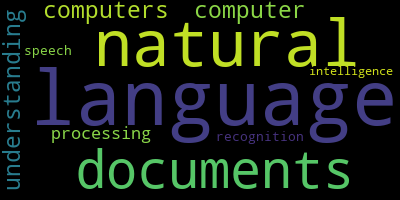

In [14]:
wc = WordCloud(background_color='black')
wc.generate_from_frequencies(weights_lda)
wc.to_image()

## Topic mixture in a document

For each of the document, we can see how each topic is represented there. 

In [15]:
topic_mixture = lda.transform(term_frequency[-1:])
np.around(topic_mixture, decimals=2)

array([[0.99, 0.  , 0.  , 0.  , 0.  ]])

This vector represent topic mixtures for the Corona Virus wiki page. As expected Topic 1 is the dominant one for this document. 

Remember the dimentionality reduction methods from the Applied Machien Learning course. **In a shallow sense, topic modeling could be considered as a dimensionality reduction method.** Here we represent a document as a topic mixture, and the number of topics is a way less than the number of terms in a document.

## Using a topic model for classification/clustering

Although the aim of a topic model is to identify the underlying structure of a document in terms of topics, given a corpus, we can use this method for classification and clustering. E.g., we can identify topic mixture of a new document, and label the document with the topic with maximum proportion as a class label.

In [16]:
chicago = wikipedia.page("Chicago", auto_suggest=False)
text7 = chicago.summary
print(lda.transform(count_vectorizer.transform([text7])))

[[0.01021409 0.01173628 0.20035086 0.69002806 0.08767071]]


The above code, we estimate the topic mixture of the "Chicago" wikipage and see that the dominant topic is Topic 4, which is City topic. 

Given the topic mixture of all of the documents, we can perform clustering on the documents in the topic space. 

## Evaluating a topic model and choosing the number of topics

As topic model is an unsupervised method, it is hard to evaluate as there is no gold standard. Here are few approaches that are commonly used for the evaluation (see [here](https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0)):

- Eye Balling Models
    - Top N words
    - Topics / Documents
- Intrinsic Evaluation Metrics
    - Capturing model semantics
    - Topics interpretability
- Human Judgements
    - What is a topic
- Extrinsic Evaluation Metrics/Evaluation at task
    - Is model good at performing predefined tasks, such as classification


Like clustering, we manually set number of topics for topic models. But it is possible to use an intrinsic or extrinsic measure to identify the desirable number of topics. One such intrinsic measure is **perplexity** score (aka predictive likelihood), and it measures the goodness-of-fit. The lower perplexity is better.   

In [17]:
scores = []
for n_topics in range(2, 7): 
    lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda.fit(term_frequency)    
    score = lda.perplexity(term_frequency)
    scores.append(score)

Text(0, 0.5, 'Perplexity')

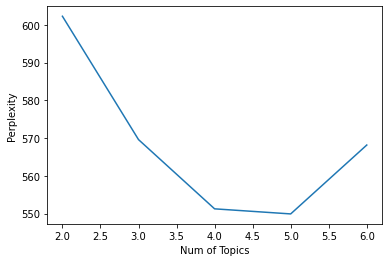

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(2,7), scores)
plt.xlabel('Num of Topics')
plt.ylabel('Perplexity')

As shown in the above plot, we can pick either 4 or 5 as the total number of topics

## Non-negative Matrix Factorization (NMF)

We can repeat the above practice with a Non-negative Matrix Factorization (NMF) method. For LDA we use TF matrix as input, but NMF method can take either of TF and TFIDF matrix as input. This time we will create a TFIDF matrix for representing the documents and then apply NFM. 



In [19]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(docs)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()


In [20]:
print(f"Shape of tfidf matrix = {tfidf.shape}")
print(f"Num of features identified = {len(tfidf_feature_names)}")

Shape of tfidf matrix = (6, 704)
Num of features identified = 704


### Fit an NMF

In [21]:
# Run NMF
nmf = NMF(n_components=5, random_state=0)
nmf.fit(term_frequency)

/opt/conda/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)


NMF(n_components=5, random_state=0)

### Display topics

In [22]:
display_topics(nmf, tfidf_feature_names, 10)

Topic 0:
county;states;metropolitan;united;area;largest;world;city;york;new
Topic 1:
spanish;new;york;largest;metropolitan;california;area;city;angeles;los
Topic 2:
long;believed;literary;title;work;great;american;gatsby;fitzgerald;novel
Topic 3:
predictions;application;field;use;computer;study;algorithms;data;machine;learning
Topic 4:
related;lethal;birds;genome;humans;mild;coronaviruses;rna;viruses;cause


Let's visualize corona topic. 

In [23]:
topic = nmf.components_[4]  # take the corona topic
no_top_words = 10

weights_nmf = {}
for i in topic.argsort()[:-no_top_words - 1:-1]:
    weights_nmf[tfidf_feature_names[i]] = topic[i]
weights_nmf

{'cause': 1.4421587385962353,
 'viruses': 1.1537269908769885,
 'rna': 0.8652952431577413,
 'coronaviruses': 0.8652952431577413,
 'mild': 0.5768634954384942,
 'humans': 0.5768634954384942,
 'genome': 0.5768634954384942,
 'birds': 0.5768634954384942,
 'lethal': 0.5768634954384942,
 'related': 0.2884324406747192}

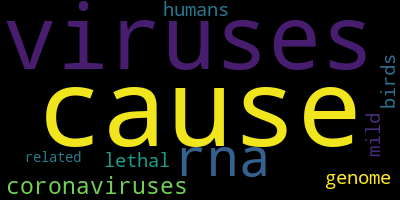

In [24]:
wc = WordCloud(background_color='black')
wc.generate_from_frequencies(weights_nmf)
wc.to_image()

In [25]:
import pandas as pd
df1 = pd.DataFrame(weights_lda.items())
df2 = pd.DataFrame(weights_nmf.items())

df = pd.concat([df1, df2], axis=1)
df

,0,1,0,1
0,language,7.199999,cause,1.442159
1,natural,5.200185,viruses,1.153727
2,documents,3.199999,rna,0.865295
3,computers,2.200235,coronaviruses,0.865295
4,computer,2.200161,mild,0.576863
5,understanding,2.199999,humans,0.576863
6,processing,2.199999,genome,0.576863
7,speech,1.200080,birds,0.576863
8,recognition,1.200080,lethal,0.576863
9,intelligence,1.200080,related,0.288432


We can see both LDA and NMF has the same word set for the Corona Virus topic, although the ordering is little bit different. 